# TinySOM examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tinysom import SOM, SOM_cluster, SOM_classify
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm.auto import tqdm

### Moons

In [2]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

#### Unsupervised embedding

  0%|          | 0/1000 [00:00<?, ?it/s]

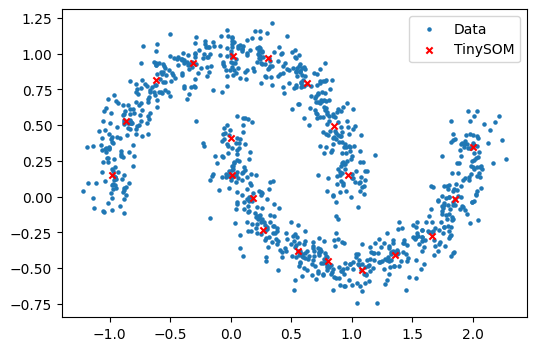

In [3]:
som = SOM(n_rows=1, n_cols=20, n_epochs=1000, metric='euclidean', neighbourhood='linear', initial='pca', kernelwt_Rmax=0.5)
som.fit(X)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(X[:,0], X[:,1], s=5, label='Data')
ax.scatter(som.wts[:,0], som.wts[:,1], label='TinySOM', color='r', s=20, marker='x')
ax.legend();

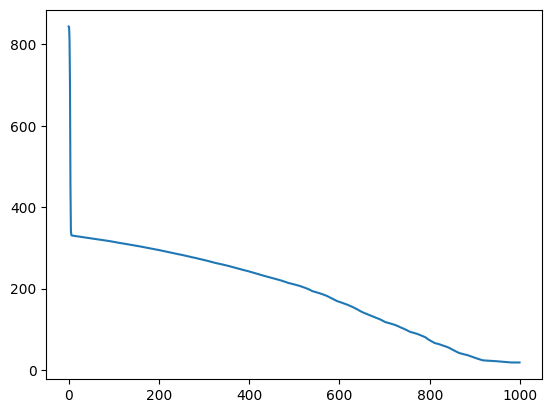

In [4]:
plt.plot(som.inertia_);

#### Unsupervised clustering

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

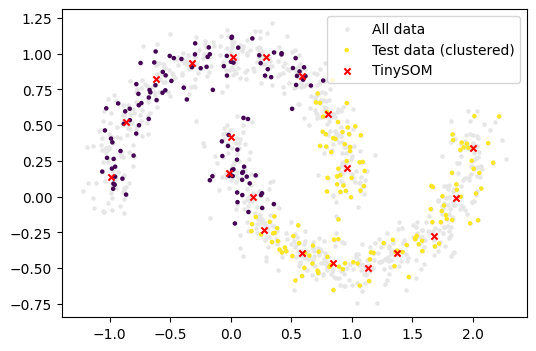

In [5]:
somc = SOM_cluster(n_rows=1, n_cols=20, n_epochs=1000, metric='euclidean', neighbourhood='linear', initial='pca', kernelwt_Rmax=0.1, n_clusters=2)
somc.fit(X_train)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(X[:,0], X[:,1], s=5, c='0.9', label='All data')
ax.scatter(X_test[:,0], X_test[:,1], s=5, c=somc.predict(X_test), label='Test data (clustered)')
ax.scatter(somc.wts[:,0], somc.wts[:,1], label='TinySOM', color='r', s=20, marker='x')
ax.legend();

#### Supervised classification

  0%|          | 0/1000 [00:00<?, ?it/s]

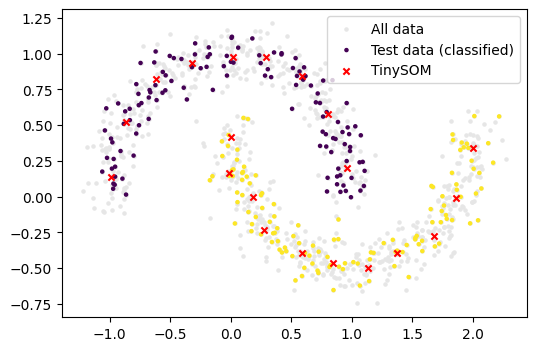

In [6]:
somc = SOM_classify(n_rows=1, n_cols=20, n_epochs=1000, metric='euclidean', neighbourhood='linear', initial='pca', kernelwt_Rmax=0.5)
somc.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(X[:,0], X[:,1], s=5, c='0.9', label='All data')
ax.scatter(X_test[:,0], X_test[:,1], s=5, c=somc.predict(X_test), label='Test data (classified)')
ax.scatter(somc.wts[:,0], somc.wts[:,1], label='TinySOM', color='r', s=20, marker='x')
ax.legend();

### Fisher's iris dataset

In [7]:
iris = load_iris()
iris_labels = iris.target_names[iris.target]
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names, index=iris_labels).rename_axis('label').reset_index()
iris_df.head(2)

,label,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


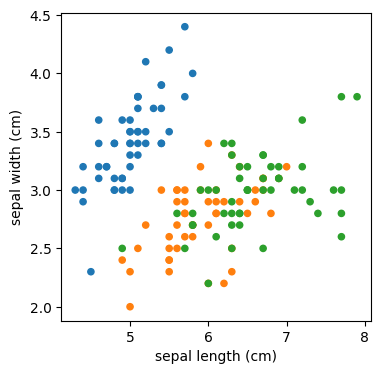

In [9]:
iris_colours = dict(zip(iris.target_names, [f'C{i}' for i in range(len(iris.target_names))]))
iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', color=iris_df['label'].map(iris_colours), figsize=(4,4));

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris.target, test_size=0.25, stratify=iris.target)

somc = SOM_classify(n_rows=7, n_cols=7, n_epochs=500, metric='euclidean', neighbourhood='linear', initial='pca', kernelwt_Rmax=0.1)
somc.fit(X_train, y_train)
print(classification_report(y_test, somc.predict(X_test)))

  0%|          | 0/500 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### MNIST digits

In [11]:
digits = load_digits()
print(digits['data'].shape)
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits.target, test_size=0.5, stratify=digits.target)

somc = SOM_classify(n_rows=10, n_cols=10, n_epochs=100, metric='euclidean', neighbourhood='linear', initial='pca', kernelwt_Rmax=0.1)
somc.fit(X_train, y_train)
print(classification_report(y_test, somc.predict(X_test)))

(1797, 64)


  0%|          | 0/100 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.94      0.97      0.95        91
           2       0.92      0.91      0.91        88
           3       0.97      0.98      0.97        92
           4       1.00      0.97      0.98        91
           5       0.98      0.97      0.97        91
           6       0.97      0.99      0.98        91
           7       0.94      1.00      0.97        89
           8       0.85      0.87      0.86        87
           9       0.97      0.87      0.92        90

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



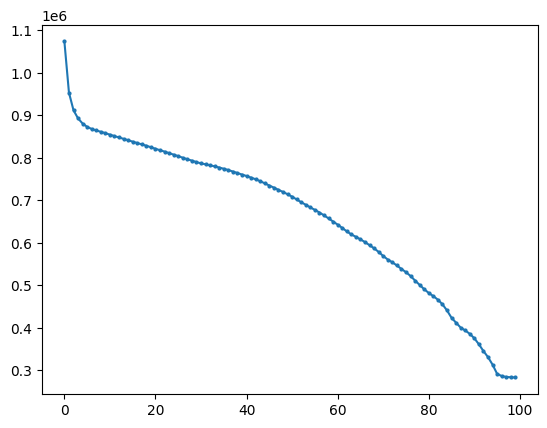

In [12]:
plt.plot(somc.inertia_, marker='o', ms=2);

  0%|          | 0/100 [00:00<?, ?it/s]

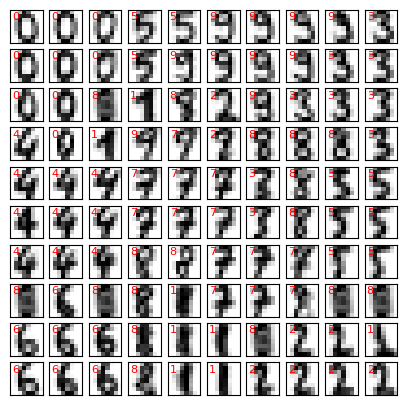

In [13]:
d = 0.5
fig, axes = plt.subplots(somc.n_rows, somc.n_cols, figsize=(d*somc.n_cols,d*somc.n_rows))
for k in tqdm(range(somc.n_cols*somc.n_rows)):
    i, j = k//somc.n_cols, k%somc.n_cols
    ax = axes[i][j]
    ax.imshow(somc.wts[k].reshape((8,8)), cmap='gray_r')
    ax.set_xticklabels([]); ax.set_yticklabels([]);
    ax.set_xticks([]); ax.set_yticks([]);
    ax.text(0, 2, f'{int(somc.neuron_to_label[k])}', fontsize=8, color='r')
    plt.grid(False);

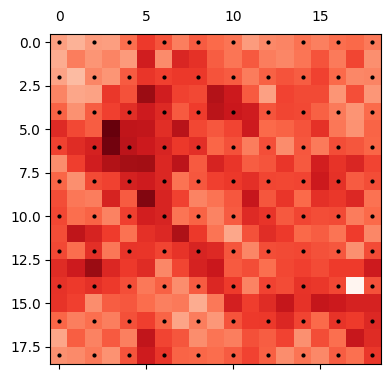

In [14]:
somc.umatrix(figsize=(4,4));

### Fashion MNIST

In [15]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [16]:
with open('../data/Fashion-MNIST/train-images-idx3-ubyte', 'rb') as f:
    X_train = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    X_train = X_train.reshape((-1, 28*28))

with open('../data/Fashion-MNIST/train-labels-idx1-ubyte', 'rb') as f:
    y_train = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

with open('../data/Fashion-MNIST/t10k-images-idx3-ubyte', 'rb') as f:
    X_test = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    X_test = X_test.reshape((-1, 28*28))

with open('../data/Fashion-MNIST/t10k-labels-idx1-ubyte', 'rb') as f:
    y_test = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

In [17]:
pct = 0.02
n_train = int(pct*X_train.shape[0])
n_test = int(pct*X_test.shape[0])
print(n_train)

1200


In [18]:
somc = SOM_classify(n_rows=8, n_cols=8, n_epochs=100, metric='euclidean', neighbourhood='linear', initial='pca', kernelwt_Rmax=0.5, feature_dropout_factor=0.2)
somc.fit(X_train[:n_train], y_train[:n_train])
print(classification_report(y_test[:n_test], somc.predict(X_test[:n_test])))

  0%|          | 0/100 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.96      0.93      0.94        27
           2       0.67      0.44      0.53        27
           3       0.72      0.76      0.74        17
           4       0.48      0.48      0.48        21
           5       0.82      0.88      0.85        16
           6       0.30      0.50      0.37        16
           7       0.85      0.85      0.85        20
           8       0.94      0.89      0.91        18
           9       0.81      0.72      0.76        18

    accuracy                           0.72       200
   macro avg       0.74      0.72      0.72       200
weighted avg       0.74      0.72      0.73       200



  0%|          | 0/64 [00:00<?, ?it/s]

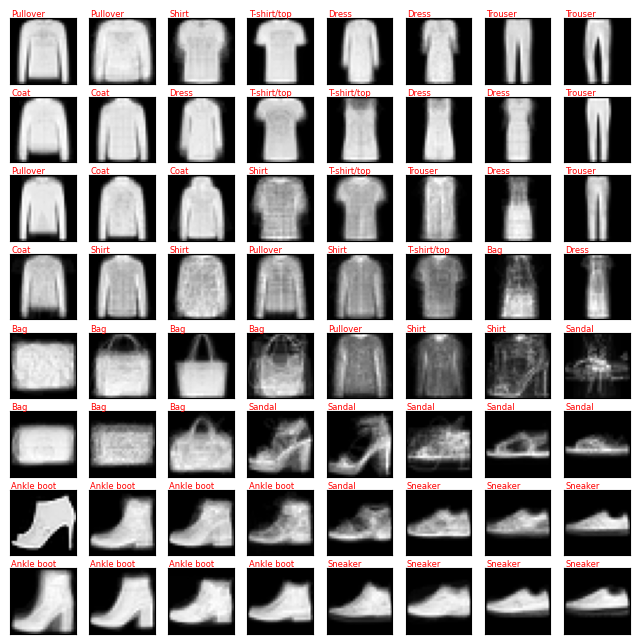

In [19]:
d = 1
fig, axes = plt.subplots(somc.n_rows, somc.n_cols, figsize=(d*somc.n_cols,d*somc.n_rows))
for k in tqdm(range(somc.n_cols*somc.n_rows)):
    i, j = k//somc.n_cols, k%somc.n_cols
    ax = axes[i][j]
    ax.imshow(somc.wts[k].reshape((28,28)), cmap='gray')
    ax.set_xticklabels([]); ax.set_yticklabels([]);
    ax.set_xticks([]); ax.set_yticks([]);
    ax.text(0, -1, f'{labels[int(somc.neuron_to_label[k])]}', fontsize=6, color='r')
    plt.grid(False);